<a href="https://colab.research.google.com/github/munavarhs/RedditDataAnalysis/blob/main/RedditDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud


In [ ]:
#Task 1
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
data = pd.read_csv('combined_file.csv')

In [ ]:
data.head()

,subreddit,id,author,timestamp,title,text,score,upvote_ratio,upvotes
0,raceplay,15ewfcf,Tusbohf_Qsphsftt_394,1.690848e+09,Looking for married Muslim men who have hijabi...,Don’t message me if you can’t live verify. Too...,1.0,1.0,1.0
1,islam,15ewi9l,Mpqtjefe-Fousz887,1.690848e+09,Share your istikhara success stories. I need s...,Salaam everyone. I’m a F currently going throu...,1.0,1.0,1.0
2,islam,15ewjma,Op-Dpnqvufs-485,1.690848e+09,Fate?,"In the Qur'an, I saw verses in these cases tha...",1.0,1.0,1.0
3,Judaism,15ewy6p,tofltboetiju,1.690849e+09,Good Thrift shop find. Highly reccomend,Holocaust book about family of Jewish Hungaria...,1.0,1.0,1.0
4,Judaism,15ex312,Dsjujdbm_Gmbuxpsn472,1.690850e+09,Wearing my kippah with tattoos,Shalom friends!\n\nI’m a Baal teshuva with man...,1.0,1.0,1.0


In [ ]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
#Pre process the data(Optional)
def preprocess_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    words = [word for word in text.split() if word not in stop_words]
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized)

In [ ]:
data['processed_text'] = data['text'].apply(preprocess_text)

In [ ]:
# Prepare data for LDA
texts = [word_tokenize(text) for text in data['processed_text']]

In [ ]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [ ]:
# Function to compute coherence score for a given number of topics
def compute_coherence_values(corpus, dictionary, texts, start, limit, step):
    coherence_scores = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=0)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append(coherence_model.get_coherence())
    return model_list, coherence_scores

In [ ]:
# Experiment with different numbers of topics
start, limit, step = 1, 11, 1
models, coherence_scores = compute_coherence_values(corpus, dictionary, texts, start, limit, step)


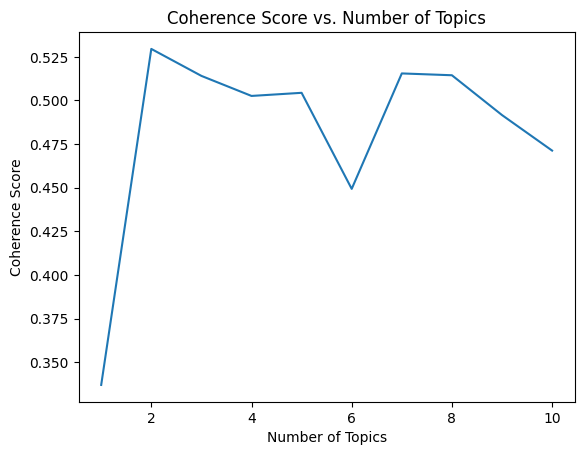

In [ ]:
# Plot coherence scores
x = range(start, limit, step)
plt.plot(x, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

In [ ]:
# Select the best model
best_model_index = coherence_scores.index(max(coherence_scores))
best_num_topics = x[best_model_index]
best_model = models[best_model_index]

In [ ]:
print(f"The best number of topics is {best_num_topics} with a coherence score of {max(coherence_scores):.4f}.")

The best number of topics is 2 with a coherence score of 0.5295.


In [ ]:
# Display the topics from the best model
for idx, topic in best_model.show_topics(formatted=True, num_topics=best_num_topics, num_words=10):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.018*"israel" + 0.011*"people" + 0.010*"palestinian" + 0.010*"hamas" + 0.007*"israeli" + 0.007*"gaza" + 0.006*"jew" + 0.005*"war" + 0.005*"one" + 0.005*"would"
Topic 1: 0.014*"im" + 0.012*"like" + 0.010*"dont" + 0.010*"know" + 0.008*"muslim" + 0.008*"would" + 0.008*"want" + 0.007*"get" + 0.006*"feel" + 0.006*"time"


In [ ]:
# Create word clouds for each topic
def create_wordcloud(topic_words, topic_idx):
    word_dict = {word.split("*")[1].strip('"'): float(word.split("*")[0]) for word in topic_words.split(" + ")}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_idx}", fontsize=16)
    plt.show()



Word Clouds for Topics:
Generating Word Cloud for Topic 0:




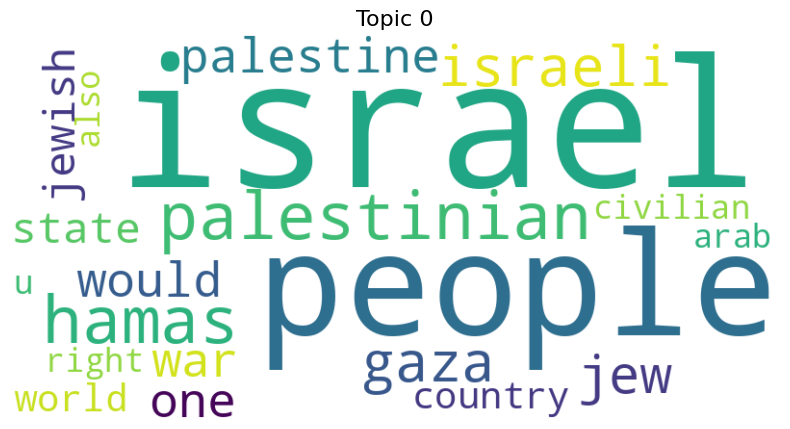

Generating Word Cloud for Topic 1:




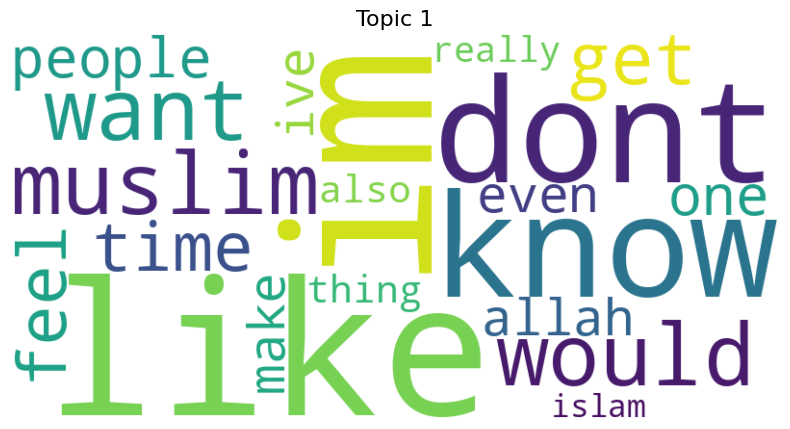

In [ ]:
print("\nWord Clouds for Topics:")
for idx, topic in best_model.show_topics(formatted=True, num_topics=best_num_topics, num_words=20):
    print(f"Generating Word Cloud for Topic {idx}:")
    print('\n')
    create_wordcloud(topic, idx)

In [ ]:
# ::::::::::::::::::::::::::::::::::::::::::::::::::::TASK2:::::::::::::::::::::::::::::::::::::::::::::::::::

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
#Imports for TASK 2
from nltk import pos_tag
from nltk.tokenize import sent_tokenize
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
#Task 2
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
data = pd.read_csv('combined_file.csv')
text_data = data["text"]

In [ ]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Dictionaries to store results
entity_sentiments = defaultdict(list)
entity_pos_tags = defaultdict(lambda: defaultdict(list))

In [ ]:
# Define entities to analyze
entities_to_analyze = ["Israel", "Hamas", "Antony Blinken", "Benjamin Netanyahu", "Netanyahu", "IDF"]

In [ ]:
# Preprocessing and analysis for Task 2
for text in text_data:
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    sentences = sent_tokenize(text)  # Split text into sentences
    for sentence in sentences:
        for entity in entities_to_analyze:
            if entity.lower() in sentence.lower():
                # Sentiment analysis
                sentiment = analyzer.polarity_scores(sentence)['compound']
                entity_sentiments[entity].append(sentiment)

                # POS tagging
                tokens = word_tokenize(sentence)
                tagged_words = pos_tag(tokens)
                for word, tag in tagged_words:
                    if tag.startswith('NN'):  # Nouns
                        entity_pos_tags[entity]['nouns'].append(word)
                    elif tag.startswith('VB'):  # Verbs
                        entity_pos_tags[entity]['verbs'].append(word)
                    elif tag.startswith('JJ'):  # Adjectives
                        entity_pos_tags[entity]['adjectives'].append(word)

In [ ]:
# Calculate average sentiment for each entity
average_sentiments = {entity: sum(scores) / len(scores) if scores else 0 for entity, scores in entity_sentiments.items()}


In [ ]:
# Display sentiment scores
print("Average Sentiment Scores:")
for entity, score in average_sentiments.items():
    print(f"{entity}: {score:.4f}")

Average Sentiment Scores:
Israel: -0.1126
Netanyahu: -0.1003
IDF: -0.1987
Hamas: -0.1906
Benjamin Netanyahu: -0.1550
Antony Blinken: -0.1039


In [ ]:
# Function to create word clouds
def create_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()


Generating Word Clouds:
Word Cloud for Israel


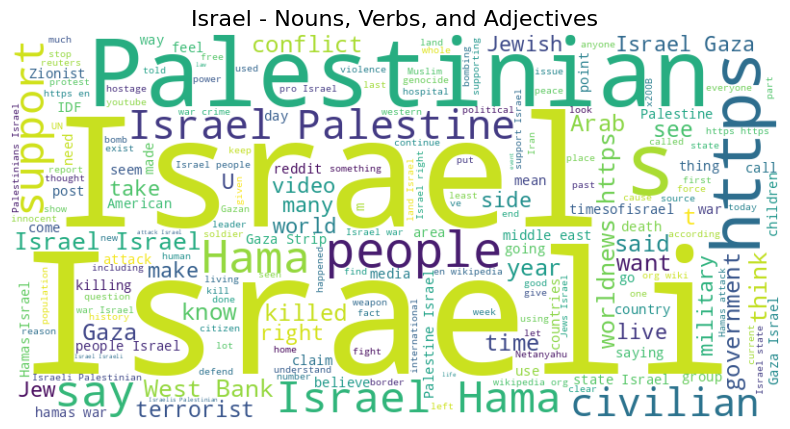

Word Cloud for Hamas


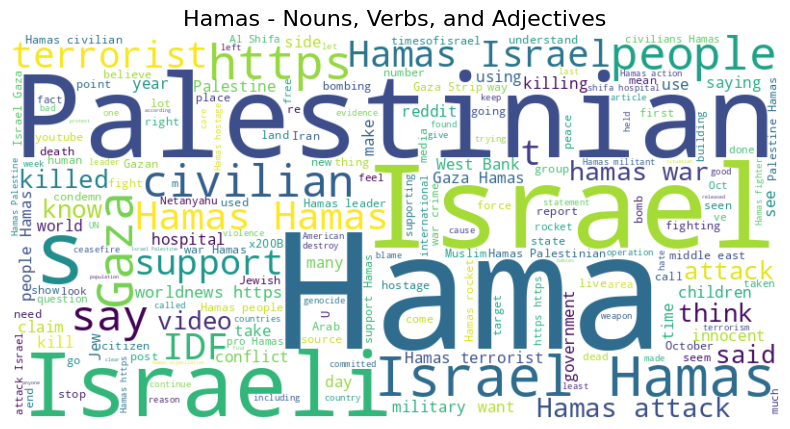

Word Cloud for Antony Blinken


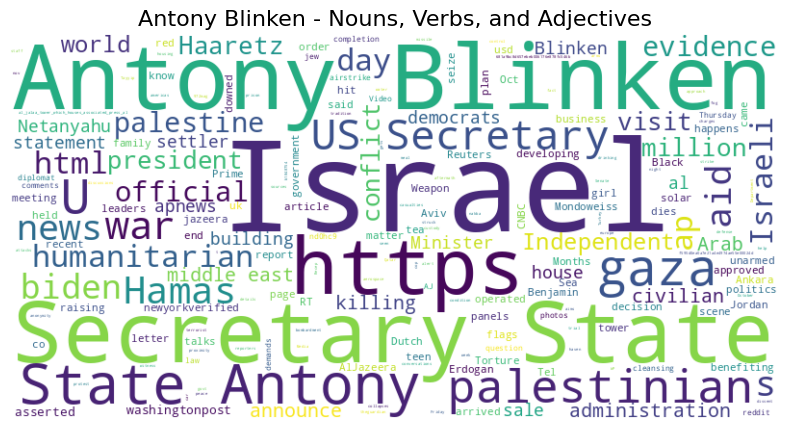

Word Cloud for Benjamin Netanyahu


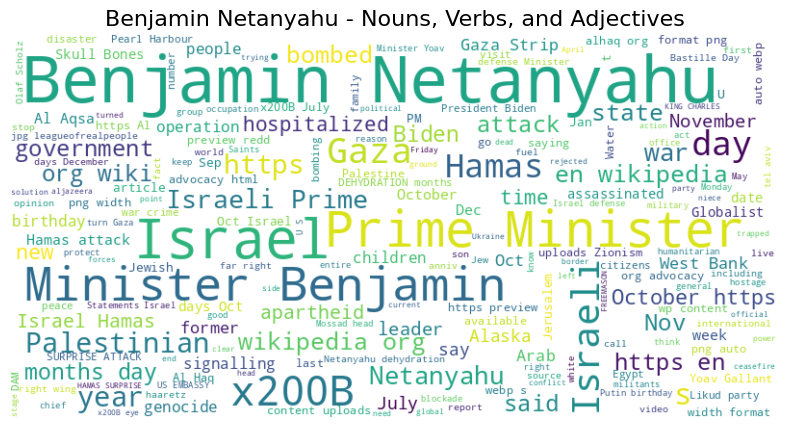

Word Cloud for Netanyahu


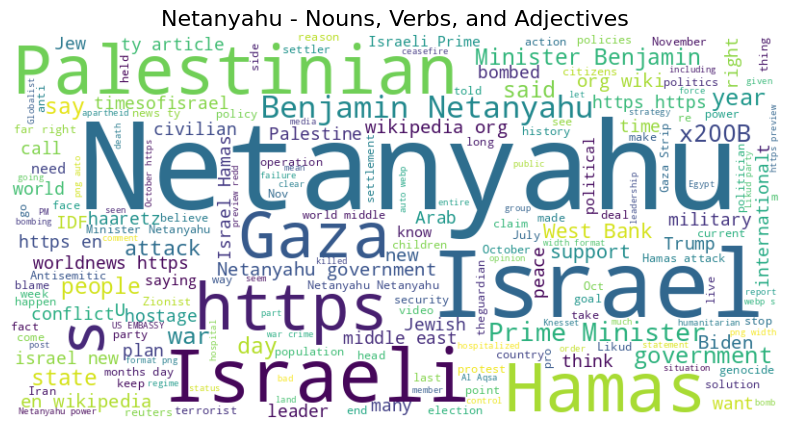

Word Cloud for IDF


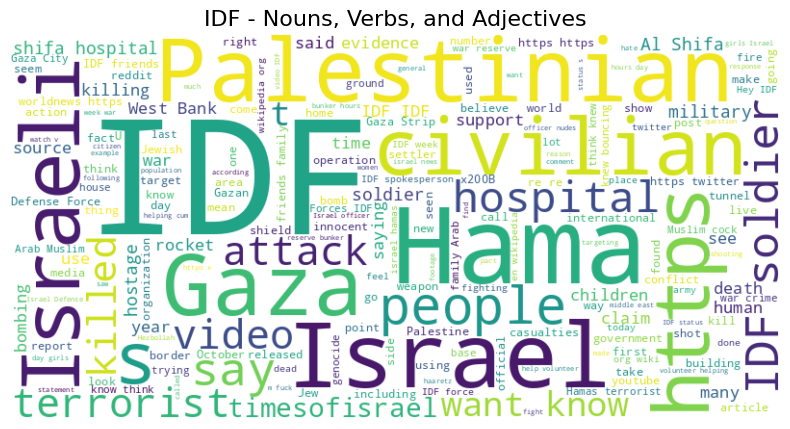

In [ ]:
# Create word clouds for each entity
print("\nGenerating Word Clouds:")
for entity in entities_to_analyze:
    print(f"Word Cloud for {entity}")
    nouns = entity_pos_tags[entity]['nouns']
    verbs = entity_pos_tags[entity]['verbs']
    adjectives = entity_pos_tags[entity]['adjectives']

    # Combine nouns, verbs, and adjectives for the word cloud
    combined_words = nouns + verbs + adjectives
    create_wordcloud(combined_words, f"{entity} - Nouns, Verbs, and Adjectives")

In [ ]:
# ::::::::::::::::::::::::::::::::::::::::::::::::::::TASK 3:::::::::::::::::::::::::::::::::::::::::::::::::::

In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 118.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.7 MB/s eta 0:00:00


In [ ]:
#Imports for Task 3
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
import gensim
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
from simpletransformers.language_representation import RepresentationModel

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
#Task-3
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_csv('combined_file.csv')

In [ ]:
data['combined_text'] = data['title'] + " " + data['text']

In [ ]:
# Feature Engineering
# 1. Valence, Arousal, Dominance (VAD) using VADER
analyzer = SentimentIntensityAnalyzer()
data['valence'] = data['combined_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
# 2. Embeddings using BERT Model
model = RepresentationModel(model_type="bert", model_name="bert-base-uncased", use_cuda=True)
embeddings = model.encode_sentences(data['combined_text'].tolist(), combine_strategy="mean")
embeddings_df = pd.DataFrame(embeddings, columns=[f'emb_{i}' for i in range(embeddings.shape[1])])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# 3. TF-IDF for bag-of-words features
tfidf = TfidfVectorizer(max_features=500)
tfidf_features = tfidf.fit_transform(data['combined_text']).toarray()
tfidf_df = pd.DataFrame(tfidf_features, columns=tfidf.get_feature_names_out())



In [ ]:
# Combine Features
features = pd.concat([data[['valence']], embeddings_df, tfidf_df], axis=1)
target = data['score']


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=17)

In [ ]:
# Model Training and Evaluation
# 1. Support Vector Machine (SVM)
svm_model = SVR(kernel='rbf', C=1, epsilon=0.4, tol=1e-2)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
print(f"SVM Mean Squared Error: {svm_mse:.2f}")

SVM Mean Squared Error: 10525.91


In [ ]:
# 2. XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=56)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost Mean Squared Error: {xgb_mse:.2f}")


XGBoost Mean Squared Error: 10537.50


In [ ]:
# Compare Models
if svm_mse < xgb_mse:
    print("SVM performed better.")
else:
    print("XGBoost performed better.")

SVM performed better.
